In [1]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

import utils

Using TensorFlow backend.


In [2]:
# Read output DF and transform index to datetimeindex
y = pd.read_csv('../data/grendene-cotacao.csv', index_col=0)
y.index = pd.to_datetime(y.index)

# Read inpout DF and transform index to datetimeindex
X = pd.read_csv('../data/grendene-indicadores-financeiros.csv', index_col=0)
X.index = pd.to_datetime(X.index)

In [3]:
# Split indo train / test datesets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


<Figure size 576x432 with 0 Axes>

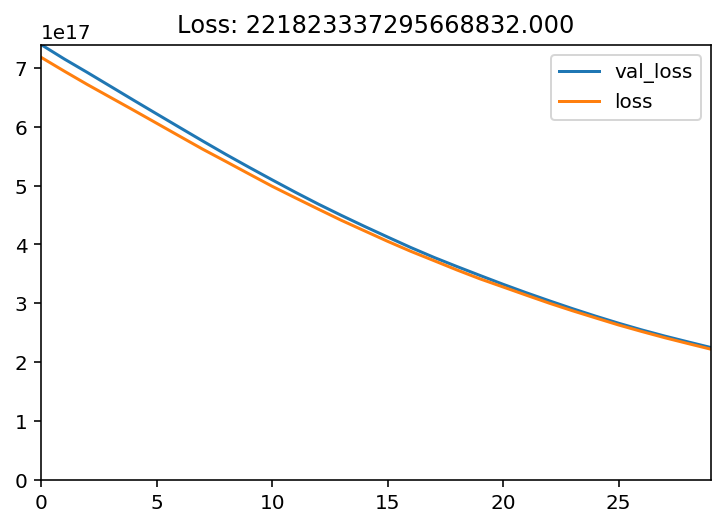

In [4]:
# First model: Linear Regression
linr_model = Sequential()
linr_model.add(Dense(1, input_shape=(X_train.shape[1],)))

linr_model.compile('adam', 'mean_squared_error')
linr_history = linr_model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=0)
utils.plot_loss(linr_history)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# scale the stock price
ss_price = StandardScaler()
y_train = ss_price.fit_transform(y_train)
y_test = ss_price.transform(y_test)

<Figure size 576x432 with 0 Axes>

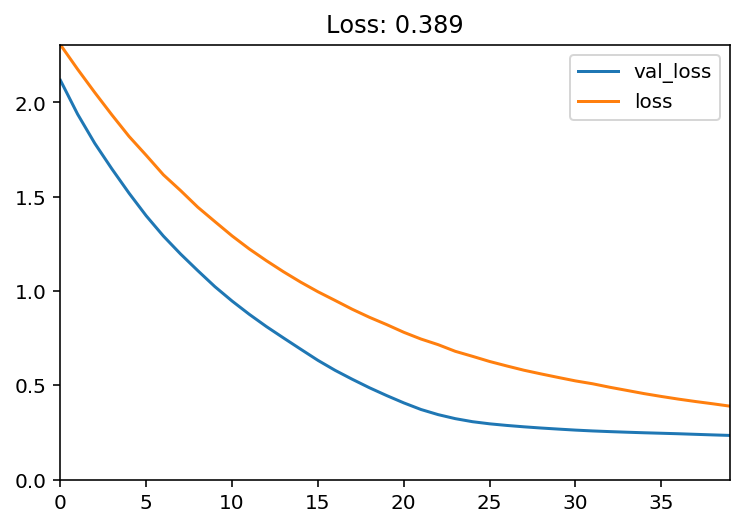

In [6]:
# First model: Linear Regression
linr_model = Sequential()
linr_model.add(Dense(1, input_shape=(X_train.shape[1],)))

linr_model.compile('adam', 'mean_squared_error')
linr_history = linr_model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=0)
utils.plot_loss(linr_history)

In [7]:
linr_model.evaluate(X_test, y_test, verbose=0)

0.5907894968986511

In [8]:
# weights data frame
linr_wdf = pd.DataFrame(linr_model.get_weights()[0].T, columns=X.columns).T.sort_values(0, ascending=False)
linr_wdf.columns = ['feature_weight']
linr_wdf.iloc[:,:]

,feature_weight
Margem Liquida %,0.36
Capital de Giro $,0.34
EBITDA por Acao $,0.33
Depreciacao e amortiz $,0.32
Ciclo Financeiro (dias),0.31
LPA Lucro por Acao $,0.31
Margem Ebitda %,0.27
Exigivel Tt / Pat Liq %,0.27
Giro do Ativo x,0.26
LAIR + Desp Fin Liq $,0.25


<Figure size 576x432 with 0 Axes>

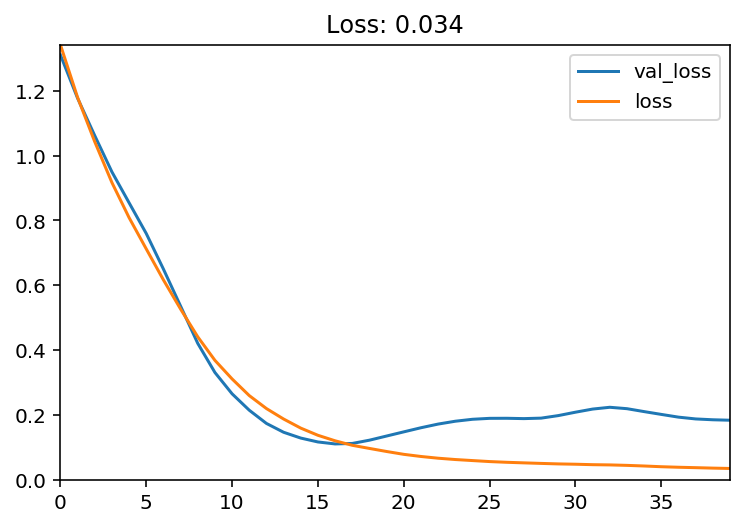

In [9]:
# ANN model
deep_model = Sequential()
deep_model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
deep_model.add(Dense(16, activation='relu'))
deep_model.add(Dense(8, activation='relu'))
deep_model.add(Dense(1))

deep_model.compile('adam', 'mean_squared_error')

deep_history = deep_model.fit(X_train, y_train, epochs=40, validation_split=0.2, verbose=0)
utils.plot_loss(deep_history)

In [10]:
deep_model.evaluate(X_test, y_test, verbose=0)

0.10613298416137695

Epoch 00003: early stopping


<Figure size 576x432 with 0 Axes>

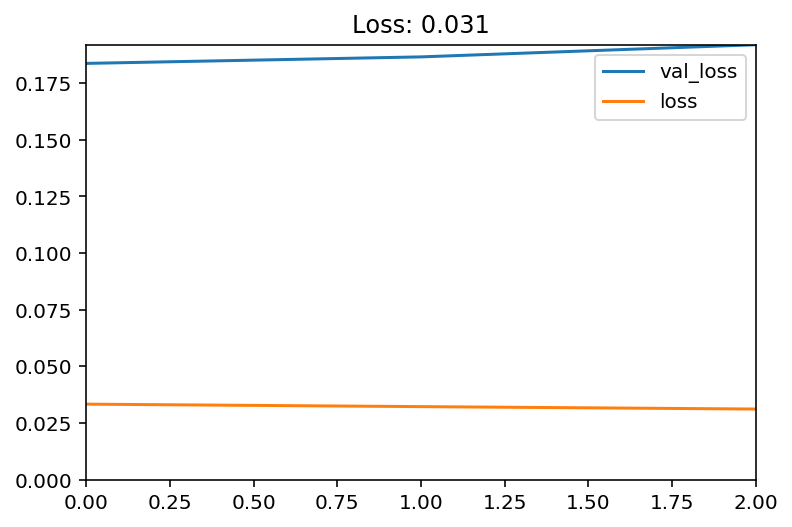

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
deep_history_early_stop = deep_model.fit(X_train, y_train, epochs=30, validation_split=0.2, 
                              callbacks=[early_stop], verbose=0)
utils.plot_loss(deep_history_early_stop)

In [12]:
deep_model.evaluate(X_test, y_test, verbose=0)

0.11230146139860153

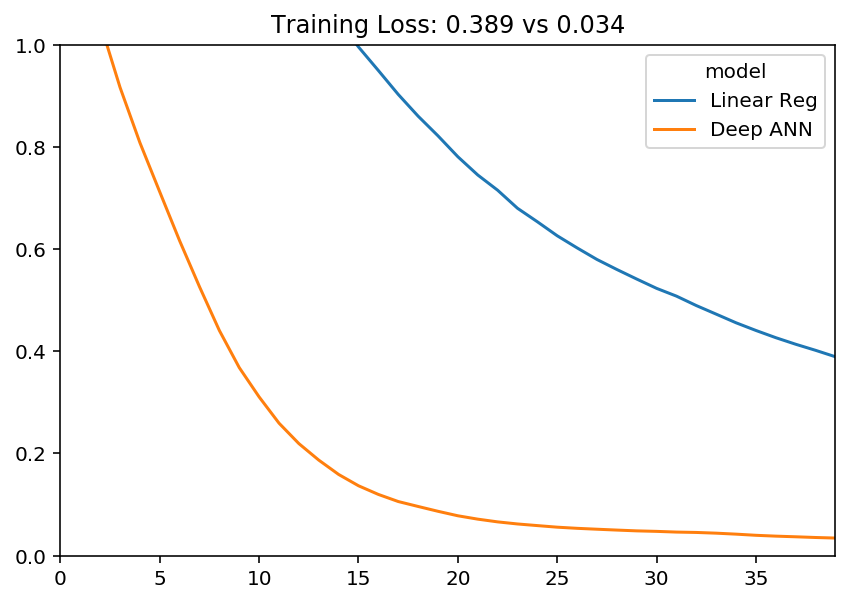

In [13]:
utils.plot_compare_histories([linr_history, deep_history], ['Linear Reg', 'Deep ANN'], plot_accuracy=False)

In [14]:
def output_dollars(num):
    return 'R$'+str("{:,}".format(float(num)))

print('Avarege stock price:', output_dollars(y.mean()))

real_prices = ss_price.inverse_transform(y_test)

# print('Training set house price:', np.mean(ss_price.inverse_transform(y_train)))

train_prices = ss_price.inverse_transform(y_train)
dumb_prices = np.zeros(real_prices.shape)
dumb_prices.fill(train_prices.mean())
dumb_error = mean_absolute_error(real_prices, dumb_prices)
print('Dumb model error:', output_dollars(dumb_error))

linr_predictions = linr_model.predict(X_test).ravel()
linr_prices = ss_price.inverse_transform(linr_predictions)
linr_error = mean_absolute_error(real_prices, linr_prices)
print('Linear model error:', output_dollars(linr_error))

deep_predictions = deep_model.predict(X_test).ravel()
deep_prices = ss_price.inverse_transform(deep_predictions)
deep_error = mean_absolute_error(real_prices, deep_prices)
print('Deep model error:', output_dollars(deep_error))

tdf = pd.DataFrame([['Naive Model', output_dollars(dumb_error)], 
                    ['Linear Regression', output_dollars(linr_error)], 
                    ['Deep ANN', output_dollars(deep_error)]], 
                   columns=['Model', 'Price Error'])
tdf

Avarege stock price: R$3.5973280267072734
Dumb model error: R$1.989307636116942
Linear model error: R$1.5810694747787586
Deep model error: R$0.7399432759537127


,Model,Price Error
0,Naive Model,R$1.989307636116942
1,Linear Regression,R$1.5810694747787586
2,Deep ANN,R$0.7399432759537127


In [15]:
print(r2_score(real_prices, dumb_prices), r2_score(real_prices, linr_prices), r2_score(real_prices, deep_prices))

-0.03302066727781394 0.24394107610229498 0.8562829522434222


In [16]:
def calc_err(a, b):
    return ((100*(b-a)/b)**2)**.5


predictions = deep_model.predict(X_test)
predictions_real = ss_price.inverse_transform(predictions)
stock_real = ss_price.inverse_transform(y_test)

err = []
for i in range(10):
	print('Predicted: %.2f vs %.2f (expected) = %.2f%% error' % (predictions_real[i], stock_real[i], calc_err(predictions_real[i], stock_real[i])))

for i in range(10):
    err.append(calc_err(predictions_real[i], stock_real[i]))

Predicted: 7.98 vs 6.70 (expected) = 19.08% error
Predicted: 5.07 vs 3.89 (expected) = 30.21% error
Predicted: 4.86 vs 4.67 (expected) = 4.04% error
Predicted: 3.00 vs 2.42 (expected) = 24.01% error
Predicted: 0.72 vs 0.80 (expected) = 10.60% error
Predicted: 1.85 vs 0.90 (expected) = 105.62% error
Predicted: 4.78 vs 4.54 (expected) = 5.14% error
Predicted: 6.42 vs 5.21 (expected) = 23.15% error
Predicted: 7.29 vs 7.85 (expected) = 7.13% error
Predicted: 4.08 vs 4.92 (expected) = 17.00% error


In [17]:
train_predictions = deep_model.predict(X_train)
train_predictions = ss_price.inverse_transform(train_predictions)
train_stock = ss_price.inverse_transform(y_train)

for i in range(40):
	print('Predicted: %.2f vs %.2f (expected) = %.2f%% error' % (train_predictions[i], train_stock[i], calc_err(train_predictions[i], train_stock[i])))


Predicted: 1.29 vs 1.04 (expected) = 24.20% error
Predicted: 4.02 vs 3.97 (expected) = 1.17% error
Predicted: 2.01 vs 1.90 (expected) = 5.67% error
Predicted: 4.90 vs 4.86 (expected) = 0.91% error
Predicted: 7.95 vs 8.56 (expected) = 7.05% error
Predicted: 3.77 vs 4.37 (expected) = 13.78% error
Predicted: 1.61 vs 1.25 (expected) = 29.11% error
Predicted: 1.09 vs 1.16 (expected) = 5.63% error
Predicted: 3.20 vs 3.24 (expected) = 1.30% error
Predicted: 4.09 vs 4.46 (expected) = 8.36% error
Predicted: 7.52 vs 7.66 (expected) = 1.87% error
Predicted: 1.69 vs 1.58 (expected) = 7.36% error
Predicted: 8.78 vs 7.98 (expected) = 10.10% error
Predicted: 3.66 vs 3.60 (expected) = 1.61% error
Predicted: 1.78 vs 1.61 (expected) = 10.96% error
Predicted: 0.95 vs 1.41 (expected) = 32.67% error
Predicted: 3.64 vs 5.16 (expected) = 29.51% error
Predicted: 1.78 vs 1.97 (expected) = 9.60% error
Predicted: 7.43 vs 8.16 (expected) = 9.00% error
Predicted: 2.67 vs 1.92 (expected) = 39.04% error
Predicted: 8